In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\moham\Downloads\Junior Data Analyst _ Data.xlsx',header=2)

In [3]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [4]:
df.describe(include="all")

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Electricity usage (kWh)'].sort_values().tail(10)

df[df['Electricity usage (kWh)'] == 46000].index

Index([276], dtype='int64')

In [8]:
df.drop(index=276, inplace=True)

<Axes: >

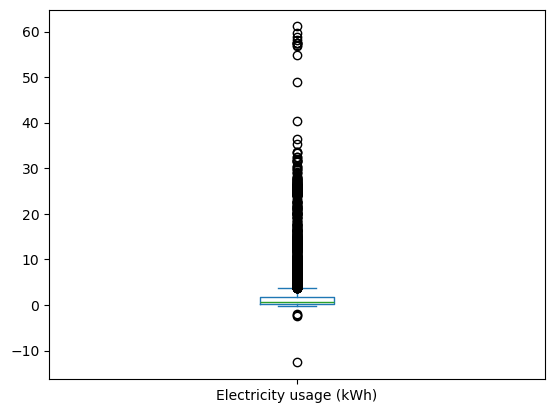

In [9]:
df['Electricity usage (kWh)'].plot(kind='box')

In [10]:
df.describe(include="all")

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8759.000000,8759,8759.000000,8759.000000
mean,11.499943,2020-07-02 08:05:28.804657920,1.116282,2.061798
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.500000,2020-04-02 06:30:00,0.000000,0.300000
50%,11.000000,2020-07-02 12:00:00,0.024000,0.621000
75%,17.500000,2020-10-01 17:30:00,1.272000,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,61.102800
std,6.922975,NaN,2.025741,4.641550


In [11]:
indexes=df[df['Electricity usage (kWh)']<0].index


In [12]:

df.drop(index=indexes, inplace=True)

In [13]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8754.000000,8754,8754.000000,8754.000000
mean,11.496687,2020-07-02 09:14:05.510623744,1.116701,2.065199
min,0.000000,2020-01-01 00:00:00,0.000000,0.000000
25%,5.000000,2020-04-02 08:15:00,0.000000,0.300000
50%,11.000000,2020-07-02 13:30:00,0.024000,0.621000
75%,17.000000,2020-10-01 18:45:00,1.274250,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,61.102800
std,6.922515,NaN,2.026210,4.639480


<Axes: xlabel='Hour', ylabel='Solar electricity generation (kWh)'>

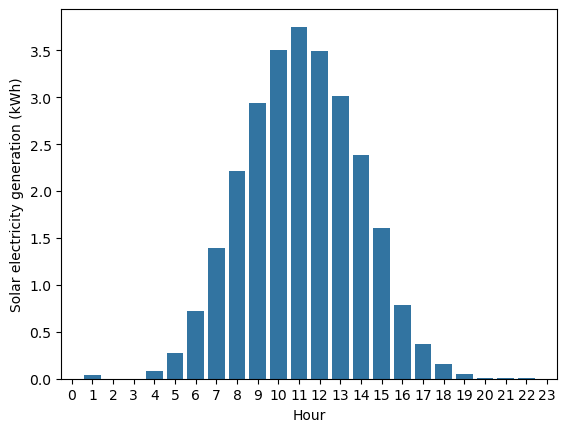

In [14]:
hourly_solar=df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
sns.barplot(hourly_solar)

<Axes: xlabel='Hour', ylabel='Electricity usage (kWh)'>

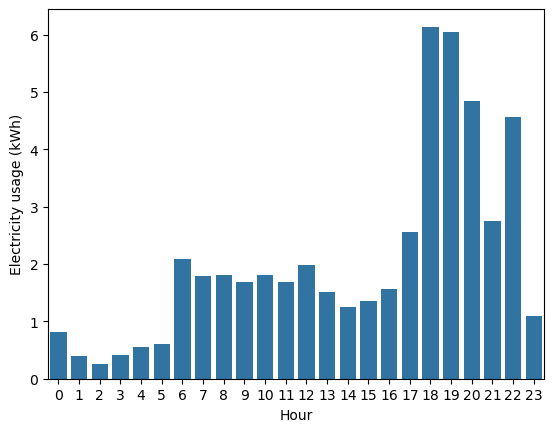

In [32]:
hourly_electricity=df.groupby('Hour')['Electricity usage (kWh)'].mean()

sns.barplot(hourly_electricity)

In [50]:
df['Electricity Bought'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df.head(24)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Electricity Bought zeros
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,-0.240000,0.000000


In [40]:
df[df['Electricity Bought']<0]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought
9,9,2020-01-01 09:00:00,0.846,0.606,-0.240
12,12,2020-01-01 12:00:00,0.651,0.396,-0.255
58,10,2020-01-03 10:00:00,1.086,0.897,-0.189
59,11,2020-01-03 11:00:00,0.993,0.726,-0.267
60,12,2020-01-03 12:00:00,2.031,0.360,-1.671
...,...,...,...,...,...
8723,11,2020-12-30 11:00:00,1.383,1.260,-0.123
8724,12,2020-12-30 12:00:00,3.957,1.308,-2.649
8725,13,2020-12-30 13:00:00,1.641,1.512,-0.129
8749,13,2020-12-31 13:00:00,2.535,0.471,-2.064


In [42]:
df['Electricity Bought'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df['Electricity Bought zeros']=df['Electricity Bought'].apply(lambda x: 0 if x<0 else x) 
df[df['Electricity Bought zeros']<0]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Electricity Bought zeros


In [46]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Electricity Bought zeros
count,8754.000000,8754,8754.000000,8754.000000,8754.000000,8754.000000
mean,11.496687,2020-07-02 09:14:05.510623744,1.116701,2.065199,0.948498,1.784927
min,0.000000,2020-01-01 00:00:00,0.000000,0.000000,-12.734032,0.000000
25%,5.000000,2020-04-02 08:15:00,0.000000,0.300000,-0.437250,0.000000
50%,11.000000,2020-07-02 13:30:00,0.024000,0.621000,0.345000,0.345000
75%,17.000000,2020-10-01 18:45:00,1.274250,1.686000,1.487625,1.487625
max,23.000000,2020-12-31 23:00:00,13.050000,61.102800,61.096800,61.096800
std,6.922515,NaN,2.026210,4.639480,5.205665,4.533389


In [48]:
df['Electricity Bought zeros']

0       1.509849
1       1.411859
2       1.023898
3       0.642000
4       0.960000
          ...   
8755    4.383600
8756    4.557600
8757    2.022000
8758    1.653000
8759    0.805919
Name: Electricity Bought zeros, Length: 8754, dtype: float64

In [52]:
df['Excess Solar generation']=df['Electricity Bought'].apply(lambda x: 0 if x>0 else x*-1)

In [56]:
df.head(24)


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Electricity Bought zeros,Excess Solar generation
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,1.509849,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,1.411859,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,1.023898,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.642000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.960000,0.000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.885000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.642000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.765000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,1.287000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,-0.240000,0.000000,0.240
